$$
% transferring macros:
\let\eps\varepsilon
\let\wt\widetilde
\let\tn\mathrm
\let\vphi\varphi
\let\pa\partial
\let\para\parallel
\let\wh\widehat
\let\sl\shoveleft
% defining new macros:
\def\be{\begin{equation} \mskip 1cm}
\def\ee{\end{equation}}
\def\ba{\begin{align} \mskip 1cm}
\def\ea{\end{align}}
\def\RR{{\bf R}}
\def\grad{\tn{grad}\,}
\def\curl{\tn{curl}\,}
\def\div{\tn{div}\,}
\def\Im{\tn{Im}}
% defining new commands:
\newcommand{\abs}[1]{\lvert#1\rvert}
\newcommand{\bold}[1]{{\bf #1}}
\newcommand{\pder}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\dt}[1]{\frac{\mathrm d #1}{\mathrm dt}}
$$

# Maxwell's equations with finite element exterior calculus

## Problem formulation

The aim of this notebook is to explain the finite element discretization of Maxwell's equations based on finite element exterior calculus (FEEC). This method is based on the de Rham complex of finite element spaces: 

<img src="pics/deRham.png" width="550"/> 

This complex is used in the discritzation of Maxwell's equations for the electric field $\bold E$ and the magnetic field $\bold B$:

$$
\ba
 \frac{1}{c^2} \pder{\bold E}{t} - \curl \bold B &= - \mu_0\bold j &&\qquad\quad\tn{(Ampère)} \,, \label{ampere}
 \\[1mm]
 \pder{\bold B}{t} + \curl \bold E &= 0 &&\qquad\quad\tn{(Faraday)} \,,
 \\[1.5mm]
 \div \bold E &= \frac{\varrho}{\eps_0} &&\qquad\quad\tn{(Gauss\,1)} \,, \label{gauss}
 \\[2mm]
 \div \bold B &= 0 &&\qquad\quad\tn{(Gauss\,2)} \,. \label{divB}
\ea
$$

Here, $\bold j$ and $\varrho$ are the given sources, namely the current density and the charge denstiy, respectively. Natural constants are the speed of light $c$, the magnetic constant $\mu_0$ and the dielectric constant $\eps_0$, where $1/c^2 = \eps_0\mu_0$. Taking the divergence of Ampère's law \eqref{ampere}, using that $\div\curl = 0$ and inserting Gauss' law \eqref{gauss} yields

$$
\be
 \pder{\varrho}{t} + \div \bold j = 0\,. \label{charge}
\ee
$$

This is a solvability condition for Maxwell's equations, called "conservation of charge". On the other hand, equation \eqref{charge} implies

$$
\be \label{alltimes}
 \dt{} \left( \div \bold E - \frac{\varrho}{\eps_0} \right) =  \frac{1}{\eps_0\mu_0}\, \div \curl \bold B - \frac{1}{\eps_0} \div \bold j - \frac{1}{\eps_0} \pder{\varrho}{t} = 0\,,
\ee
$$

Similarly,

$$
\be
 \dt{}\, \div \bold B = - \div \curl \bold E = 0\,,
 \ee
$$

which means that the two Gauss laws are satisfied at all times provided that they are satisfied at the initial time. The commuting diagram property of the deRham complex allows for numerical schemes that translate this property to the discrete level exactly (up to machine precision).

Let us start with the one dimensional case (1D). For this we assume that variations of $\bold E$ and $\bold B$ occurr only with respect to the $x$-direction, hence

$$
\be
 \grad = \begin{pmatrix} \pder{}{x} \\ 0 \\ 0  \end{pmatrix} \,,\qquad \curl \bold E = \begin{pmatrix} 0 \\ -\pder{E_z}{x} \\ \pder{E_y}{x} \end{pmatrix}\,,\qquad \div \bold E = \pder{E_x}{x}\,.
\ee
$$

Moreover, let us assume $E_z = B_x = B_y = 0$ and denote $E := E_y$, $j:= j_y$ and $B:= B_z$. Maxwell's equations then read

$$
\ba
 &\frac{1}{c^2} \pder{E_x}{t} = - \mu_0 j_x &&\qquad\quad\tn{(Ampère\,first\,component)} \,, \label{ampere:1Dx}
 \\[1mm]
 &\frac{1}{c^2} \pder{E}{t} + \pder{B}{x} = - \mu_0 j &&\qquad\quad\tn{(Ampère\,second\,component)} \,, \label{ampere:1D}
 \\[1mm]
 &\pder{B}{t} + \pder{E}{x} = 0 &&\qquad\quad\tn{(Faraday)} \,. \label{faraday:1D}
\ea
$$

We assume the domain to be $\Omega = (a,b)$ and suppose homogeneous Dirichlet boundary conditions for $E$ and periodic conditions for $E_x$ and $B$. In order to obtain a weak formulation of \eqref{ampere:1Dx}-\eqref{faraday:1D} we multiply by testfunctions $F_x$, $F$ and $C$ and integrate over $\Omega$:

$$
\ba
 &\frac{1}{c^2} \int_a^b \pder{E_x}{t} F_x\,\tn d x = - \mu_0 \int_a^b j_x F_x\,\tn d x\,, \label{int:1}
 \\[1mm]
 &\frac{1}{c^2} \int_a^b \pder{E}{t} F\,\tn d x + \int_a^b \pder{B}{x} F\,\tn d x = - \mu_0 \int_a^b j \,F\,\tn d x\,, 
 \\[1mm]
 &\int_a^b \pder{B}{t} C\,\tn d x + \int_a^b \pder{E}{x} C\,\tn d x = 0\,. \label{int:3}
\ea
$$

There are multiple possibilities to use this for a weak formulation of \eqref{int:1}-\eqref{int:3}. We choose the following: find $(E_x,E,B)\in H^1\times H^1_0 \times L^2$ such that

$$
\ba
 &\frac{1}{c^2} \int_a^b \pder{E_x}{t} F_x\,\tn d x = - \mu_0 \int_a^b j_x F_x\,\tn d x \qquad &&\forall\, F_x \in H^1\,, \label{weak:1}
 \\[1mm]
 &\frac{1}{c^2} \int_a^b \pder{E}{t} F\,\tn d x - \int_a^b B\,\pder{F}{x} \,\tn d x = - \mu_0 \int_a^b j \,F\,\tn d x \qquad &&\forall\, F \in H^1_0\,, 
 \\[1mm]
 &\int_a^b \pder{B}{t} C\,\tn d x + \int_a^b \pder{E}{x} C\,\tn d x = 0 \qquad &&\forall\, C \in L^2\,. \label{weak:3}
\ea
$$

Remark that we intgrated by parts in the second equation in order to obtain a well defined weak formulation.

## Discretization

The problem \eqref{weak:1}-\eqref{weak:3} contains only first order derivatives. Our aim is to choose solution spaces that satisfy a commuting diagram. A simpler 1D version of the above deRham complex reads as follows:

<img src="pics/deRham1D.png" width="220"/>

The projectors $\Pi_0$ and $\Pi_1$ are chosen such that the diagram is commuting. We shall implement such projectors for Lagrange finite elements and for spline finite elements.

### Lagrange finite elements

Let us start by defining the mesh points over the domian $\Omega$:

## Discretization

The problem \eqref{weak:1}-\eqref{weak:3} contains only first order derivatives. Our aim is to choose solution spaces that satisfy a commuting diagram. A simpler 1D version of the above deRham complex reads as follows:

<img src="pics/deRham1D.png" width="220"/>

The projectors $\Pi_0$ and $\Pi_1$ are chosen such that the diagram is commuting. We shall implement such projectors for Lagrange finite elements and for spline finite elements.

### Lagrange finite elements

Let us start by defining the mesh points over the domian $\Omega$:

We want to define the so-called _shape functions_ $\eta_n$ on the reference element $I=[-1,1]$, where $n \in [d]$ and $d$ is the degree of the polynomials. The interval $I$ is thus separated into $d$ elements of equal size, whose interfaces are denoted by $s_n$: 

In [1]:
import numpy as np

d = 1
# polynomial degree

s = np.linspace(-1, 1, d + 1)
print('s =',s)
print()
for n in range(len(s)):
    print('s({0}) = {1:3.2f}'.format(n,s[n]))
# mesh on the reference element

s = [-1.  1.]

s(0) = -1.00
s(1) = 1.00


In [2]:
whos

Variable   Type       Data/Info
-------------------------------
d          int        1
n          int        1
np         module     <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
s          ndarray    2: 2 elems, type `float64`, 16 bytes


For Lagrange polynomials of degree $d$ we have

$$
\be
 \eta_n(s) = \prod_{m \neq n} \frac{s - s_m}{s_n - s_m}\,.
\ee
$$

Let us implement these as python functions. We will start with _lambda functions_ and then move on to polynomials defined via specialized numpy commands.

In [3]:
η1_0 = lambda s: (1-s)/2
η1_1 = lambda s: (1+s)/2
# note that s here is a dummy to define the function, 
# while the variable s in the namespace is still an ndarray:
print(η1_0(s))
print(η1_1(s))

[1. 0.]
[0. 1.]


In [4]:
η1 = []
print(η1)
η1.append(η1_0)
print(η1)
η1.append(η1_1)
print(η1)
print(η1[0](s))
print(η1[1](s))

[]
[<function <lambda> at 0x7f855c1f0378>]
[<function <lambda> at 0x7f855c1f0378>, <function <lambda> at 0x7f85440ffbf8>]
[1. 0.]
[0. 1.]


In [82]:
# Our next aim is to automate that and write a class for creating Lagrange shape functions.
from scipy.integrate import fixed_quad as gauss_int

class LagrangeShape:
    '''The class for 1D Lagrange shape functions on the interval [-1,1].
    
    LagrangeShape(pts)
    
    Parameters: 
        pts : _ndarray_
            Rank 1 array of increasing values in [-1, 1] defining the Lagrange polynomials.   
                    
    Returns:
        self.kind : _string_
            Is set to 'lagrange'
        self.d : _int_
            Polynomial degree
        self.s : _ndarray_
            The input array pts
        self.eta : _list_
            List elements are the shape functions in 'poly1d' format 
        self.Deta : _list_
            List elements are the derivatives of the shape functions in 'poly1d' format  
    '''
    
    kind = 'lagrange'
    
    def __init__(self, pts):
        
        # polynomial degree
        self.d = len(pts) - 1
        # elements of the reference interval
        self.s = pts
        # shape functions
        self.eta = [] 
        for i in range(self.d + 1):
            condition = self.s != self.s[i]
            roots = np.compress(condition, self.s) 
            self.eta.append(np.poly1d(roots, r=True)) # Numerator of Lagrange polynomial
            for j in range(len(roots)):
                self.eta[i] /= self.s[i] - roots[j] # Denominator of Lagrange polynomial
                
        # derivatives of shape functions
        self.Deta = []
        for i in range(self.d + 1):
            self.Deta.append(np.polyder(self.eta[i]))
            
        # mass and stiffness matrix:
        self.mass = np.zeros((self.d + 1, self.d + 1))
        self.stiff = np.zeros((self.d + 1, self.d + 1))
        for i in range(self.d + 1):
            for j in range(self.d + 1): 
                antider = np.polyint(self.eta[i]*self.eta[j])
                self.mass[i, j] = antider(1) - antider(-1)
                antider_D = np.polyint(self.Deta[i]*self.Deta[j])
                self.stiff[i, j] = antider_D(1) - antider_D(-1)
            

In [83]:
# Create an object with the desired degree:
lag = LagrangeShape(np.linspace(-1, 1, 2 + 1))
print(lag.__doc__)
print('kind =', lag.kind)
print('d =', lag.d)
print('s =', lag.s)
print('eta =', lag.eta)
print('Deta =', lag.Deta)
print('mass =', lag.mass)
print('stiff =', lag.stiff)

The class for 1D Lagrange shape functions on the interval [-1,1].
    
    LagrangeShape(pts)
    
    Parameters: 
        pts : _ndarray_
            Rank 1 array of increasing values in [-1, 1] defining the Lagrange polynomials.   
                    
    Returns:
        self.kind : _string_
            Is set to 'lagrange'
        self.d : _int_
            Polynomial degree
        self.s : _ndarray_
            The input array pts
        self.eta : _list_
            List elements are the shape functions in 'poly1d' format 
        self.Deta : _list_
            List elements are the derivatives of the shape functions in 'poly1d' format  
    
kind = lagrange
d = 2
s = [-1.  0.  1.]
eta = [poly1d([ 0.5, -0.5,  0. ]), poly1d([-1., -0.,  1.]), poly1d([0.5, 0.5, 0. ])]
Deta = [poly1d([ 1. , -0.5]), poly1d([-2., -0.]), poly1d([1. , 0.5])]
mass = [[ 0.26666667  0.13333333 -0.06666667]
 [ 0.13333333  1.06666667  0.13333333]
 [-0.06666667  0.13333333  0.26666667]]
stiff = [[ 1.166666

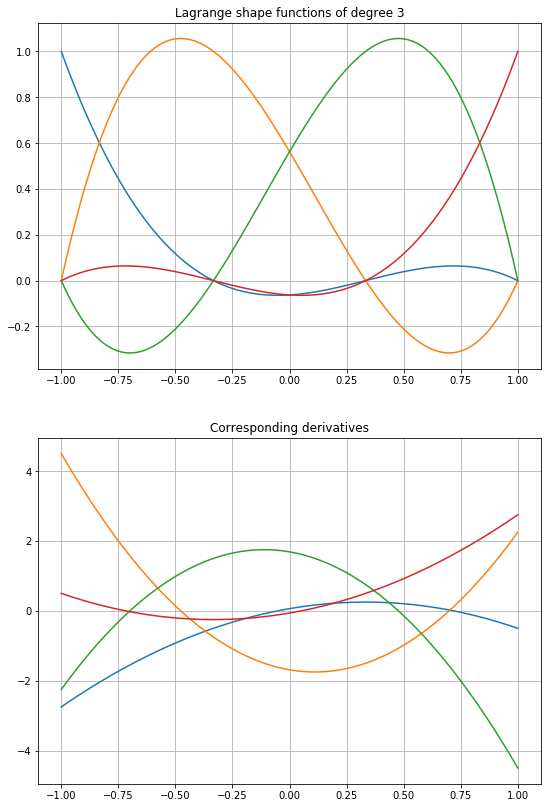

In [81]:
fig = plt.figure(figsize=(9, 14))
axes = fig.subplots(2, 1)
(ax1, ax2) = axes 

for i in range(lag.d + 1):
    ax1.plot(svec, lag.eta[i](svec))
    ax2.plot(svec, lag.Deta[i](svec))
    
ax1.grid()
ax1.set(title='Lagrange shape functions of degree ' + str(lag.d))
ax2.grid()
ax2.set(title='Corresponding derivatives')

plt.show()

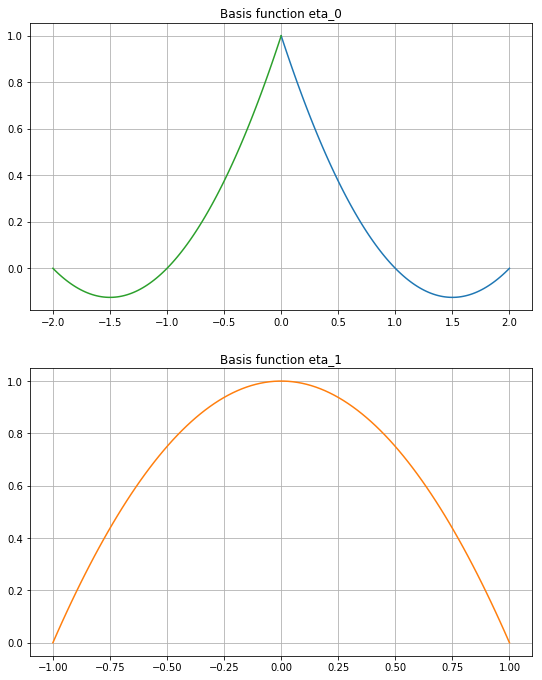

In [35]:
fig = plt.figure(figsize=(9, lag.d*8 + 2 ))
axes = fig.subplots(lag.d + 1, 1) 

for i in range(lag.d + 1):
    
    if i == lag.d:
        axes[0].plot(svec - lag.s[i], lag.eta[i](svec), color='C' + str(i))
    else:
        axes[i].plot(svec - lag.s[i], lag.eta[i](svec), color='C' + str(i))
        axes[i].grid()
        axes[i].set(title='Basis function eta_' + str(i))

fig.delaxes(axes[lag.d])
plt.show()

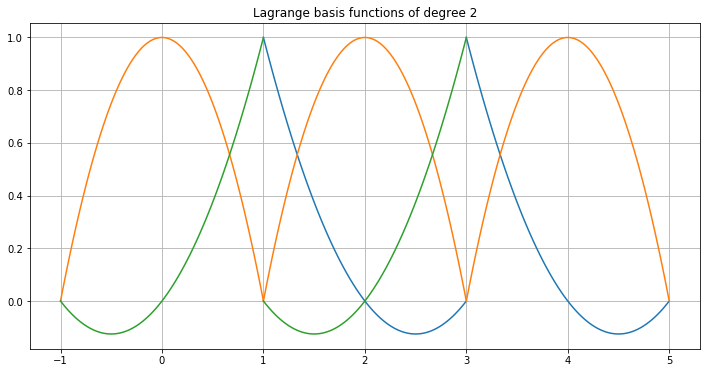

In [36]:
fig = plt.figure(figsize=(12, 6))
ax = fig.subplots()

for i in range(lag.d + 1):
    
    if i == 0:
        ax.plot(svec + 2, lag.eta[i](svec), color='C' + str(i))
        ax.plot(svec + 4, lag.eta[i](svec), color='C' + str(i))
    elif i == lag.d:
        ax.plot(svec, lag.eta[i](svec), color='C' + str(i))
        ax.plot(svec + 2, lag.eta[i](svec), color='C' + str(i))
    else:
        ax.plot(svec, lag.eta[i](svec), color='C' + str(i))
        ax.plot(svec + 2, lag.eta[i](svec), color='C' + str(i))
        ax.plot(svec + 4, lag.eta[i](svec), color='C' + str(i))
    
    
ax.grid()
ax.set(title='Lagrange basis functions of degree ' + str(lag.d))

plt.show()

In [37]:
el_ifs = np.linspace(-np.pi, np.pi, 2**4 + 1)
# element interfaces (defining the simulation domain including the boundaries)
# can be any 1D array with strictly increasing entries
print('len(el_ifs) =', len(el_ifs))
print()
for i in range(len(el_ifs)):
    print('el_ifs({0}) = {1:3.2f}'.format(i, el_ifs[i]))

Nel = len(el_ifs) - 1
print('\nNel =', Nel)
# number of elements
deg = lag.d
# polynomial degree
NN = Nel*(deg + 1) - (Nel - 1)
N0 = NN - 2 
N1 = NN - 1
# number of degrees of freedom (NN including the boundary)
print('\nNN =', NN)

# mesh points

len(el_ifs) = 17

el_ifs(0) = -3.14
el_ifs(1) = -2.75
el_ifs(2) = -2.36
el_ifs(3) = -1.96
el_ifs(4) = -1.57
el_ifs(5) = -1.18
el_ifs(6) = -0.79
el_ifs(7) = -0.39
el_ifs(8) = 0.00
el_ifs(9) = 0.39
el_ifs(10) = 0.79
el_ifs(11) = 1.18
el_ifs(12) = 1.57
el_ifs(13) = 1.96
el_ifs(14) = 2.36
el_ifs(15) = 2.75
el_ifs(16) = 3.14

Nel = 16

NN = 33


In [40]:
from scipy import integrate

In [47]:
integrate?

In [46]:
integrate.fixed_quad?

In [45]:
integrate.quadrature?

In [50]:
from scipy.integrate import fixed_quad as gauss_int

In [51]:
gauss_int?